# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

       - The dataset represents the used car market, which is significant for both buyers and sellers. For buyers, it's crucial to find a reliable vehicle that fits their budget and meets their needs. For sellers, accurately pricing their vehicle to sell promptly while maximizing return is key. Understanding market trends, pricing strategies, and the factors that influence the value of used cars can help both parties make informed decisions.

### **The objective:**

 - What is the intended goal?

       - The primary goal is to analyze the used car dataset to extract insights that could help in predicting the price of a used car based on its features (e.g., make, model, year, kilometers driven, fuel type, etc.). This could involve developing a predictive model that estimates a car's market value, enabling sellers to price their cars competitively and buyers to identify fair deals.

### **The key questions:**

 - What are the key questions that need to be answered?

       - What factors most significantly affect the price of a used car?
       - How does the depreciation of a car's value change over time and with use?
       - How does the depreciation of a car's value change over time and with use?
       - What is the impact of the car's location, fuel type, and transmission type on its price?
       - How do different brands and models compare in terms of value retention?

### **The problem formulation**:

 - What is it that we are trying to solve using data science?
   
       - Using data science, we aim to formulate a problem where we can apply statistical analysis and machine learning techniques to predict the price of used cars. The challenge involves cleaning the dataset, handling missing values, exploring and visualizing the data to understand patterns, and eventually, modeling the data to predict prices. The success of this problem-solving endeavor hinges on accurately forecasting used car prices based on historical data and features, which can then be leveraged by stakeholders in the used car market for better decision-making.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings("ignore")

### **Let us load the data**

In [2]:
df = pd.read_csv('used_cars.csv')
df.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


## Data Overview

- Observations
- Sanity checks

In [3]:
# Observations: Basic statistical summary for numerical columns
numerical_summary = df.describe()

# Check for missing values across the dataset
missing_values = df.isnull().sum()

# Sanity Checks: Initial examination of unique values in categorical columns to ensure consistency
unique_fuel_type = df['Fuel_Type'].unique()
unique_transmission = df['Transmission'].unique()
unique_owner_type = df['Owner_Type'].unique()

numerical_summary, missing_values, unique_fuel_type, unique_transmission, unique_owner_type

print("Numerical Summary: \n")
print(numerical_summary)
print("\nUniques Fuel Types: \n")
print(unique_fuel_type)
print("\nMissing Value: \n")
print(missing_values)
print("\nUnique Transmission: \n")
print(unique_transmission)
print("\nUnique Owner Type: \n")
print(unique_owner_type)

Numerical Summary: 

             S.No.         Year  Kilometers_Driven      Mileage       Engine  \
count  7253.000000  7253.000000       7.253000e+03  7251.000000  7207.000000   
mean   3626.000000  2013.365366       5.869906e+04    18.141580  1616.573470   
std    2093.905084     3.254421       8.442772e+04     4.562197   595.285137   
min       0.000000  1996.000000       1.710000e+02     0.000000    72.000000   
25%    1813.000000  2011.000000       3.400000e+04    15.170000  1198.000000   
50%    3626.000000  2014.000000       5.341600e+04    18.160000  1493.000000   
75%    5439.000000  2016.000000       7.300000e+04    21.100000  1968.000000   
max    7252.000000  2019.000000       6.500000e+06    33.540000  5998.000000   

             Power        Seats    New_price        Price  
count  7078.000000  7200.000000  1006.000000  6019.000000  
mean    112.765214     5.280417    22.779692     9.479468  
std      53.493553     0.809277    27.759344    11.187917  
min      34.200000

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

##### Answers to Questions:

1. **Summary Statistics of the Data**:
   - **Numerical Variables**: The summary statistics for numerical variables have been observed. Key points include the range of years from 1996 to 2019, kilometers driven up to 6,500,000 (which seems anomalously high), and a wide range of prices from 0.44 to 160 lakhs.
   - **Categorical Variables**: The dataset includes several categorical variables such as `Fuel_Type`, `Transmission`, and `Owner_Type` with a limited and reasonable set of options in each category.

2. **Number of Unique Observations in Each Category**:
   - `Fuel_Type`: 5 unique values (CNG, Diesel, Petrol, LPG, Electric)
   - `Transmission`: 2 unique values (Manual, Automatic)
   - `Owner_Type`: 4 unique values (First, Second, Fourth & Above, Third)

**Findings/Observations/Insights**:
- The diversity in `Fuel_Type` and `Owner_Type` categories suggests variability in the used car market, potentially impacting car prices.
- The presence of electric vehicles, though likely small in number, indicates the dataset's coverage of newer trends in the automotive market.
- The majority of data missing is in the `New_price` column, which could limit analyses related to the car's original value versus its current (used) price.

In [4]:
# Removing unrealistic data entries
# Criteria for removal:
# 1. Kilometers_Driven excessively high (setting a threshold at 1,000,000)
# 2. Mileage of 0 kmpl as unrealistic

df_cleaned = df[(df['Kilometers_Driven'] < 1_000_000) & (df['Mileage'] > 0)]

# Re-evaluate summary statistics after removal of unrealistic data
cleaned_numerical_summary = df_cleaned.describe()
cleaned_missing_values = df_cleaned.isnull().sum()

print(cleaned_numerical_summary)
print(cleaned_missing_values)

             S.No.        Year  Kilometers_Driven      Mileage       Engine  \
count  7169.000000  7169.00000        7169.000000  7169.000000  7135.000000   
mean   3629.460734  2013.40996       57670.498256    18.346859  1615.651437   
std    2092.556249     3.20679       37421.025489     4.158106   592.430963   
min       0.000000  1996.00000         171.000000     6.400000   624.000000   
25%    1819.000000  2012.00000       34000.000000    15.300000  1198.000000   
50%    3632.000000  2014.00000       53190.000000    18.200000  1493.000000   
75%    5441.000000  2016.00000       73000.000000    21.100000  1968.000000   
max    7252.000000  2019.00000      775000.000000    33.540000  5998.000000   

             Power        Seats    New_price        Price  
count  7039.000000  7130.000000  1001.000000  5948.000000  
mean    112.656266     5.282188    22.680080     9.447268  
std      53.418961     0.809212    27.773499    11.117326  
min      34.200000     2.000000     3.910000    

3. **Extreme Values in Different Columns**:
- **Unrealistic Values**: The extreme value of 6,500,000 kilometers driven stands out as unrealistic. Additionally, a minimum mileage of 0 kmpl suggests potential data entry errors or placeholders for unknown values.

**Action on Unrealistic Data**:
- We'll remove entries with clearly unrealistic values, such as cars with mileage reported as 0 kmpl or excessively high kilometers driven.

After cleaning the dataset by removing entries with unrealistic values, such as excessively high kilometers driven and cars with 0 kmpl mileage, we have the following updates:

##### Cleaned Data Overview:

- The dataset now contains 7,169 entries, with adjustments made for entries beyond realistic thresholds.
- The range of `Kilometers_Driven` has been refined to a maximum of 775,000, which is more realistic compared to the previous maximum value.
- All entries with `Mileage` of 0 kmpl have been removed, ensuring that all vehicles have a valid mileage value.
- The summary statistics now reflect these adjustments, providing a more accurate representation of the used cars' data.

##### Updated Observations:

- **Missing Values**: The cleaned dataset still shows missing values in columns such as `Engine`, `Power`, `Seats`, and a significant number in `New_price`. The `Price` column also has missing values, which are critical for any predictive modeling related to car valuation.
- **Numerical Summary**: The summary statistics for numerical variables have been updated, showing a more realistic distribution of data, particularly in the `Kilometers_Driven` and `Mileage` columns.

##### Insights from Cleaning Process:

- Removing unrealistic entries helps in improving the quality of the dataset, making it more suitable for analysis and modeling.
- The presence of missing values, especially in `New_price` and `Price`, indicates the need for imputation strategies or the exclusion of these entries for specific analyses where these values are essential.
- The adjustments made to the dataset support more reliable analysis and predictive modeling efforts by ensuring that the data used reflects realistic and plausible scenarios in the used car market.

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

##### 1. Univariate Analysis for Numerical and Categorical Variables

We will start by analyzing the distribution of both numerical and categorical variables. For numerical variables, we'll look at summary statistics and histograms to understand their distributions. For categorical variables, we'll examine the frequency of each category.

##### 2. Check the Distribution of Different Variables

We'll use visualizations to check if the distributions of numerical variables are skewed. Skewness refers to the asymmetry in the distribution of data, which can affect statistical analyses and model performance.

##### 3. Log Transformation

If we find variables that are highly skewed, a log transformation might be applied to make the distribution more normal. This is often done to reduce the impact of outliers and make the data more suitable for analysis and modeling.

##### 4. Perform Log Transformation

Based on the observation of skewness, we'll decide which variables require log transformation. After performing the transformation, we'll observe the changes in the distribution and document our findings.

In [5]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Numerical columns for univariate analysis
numerical_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

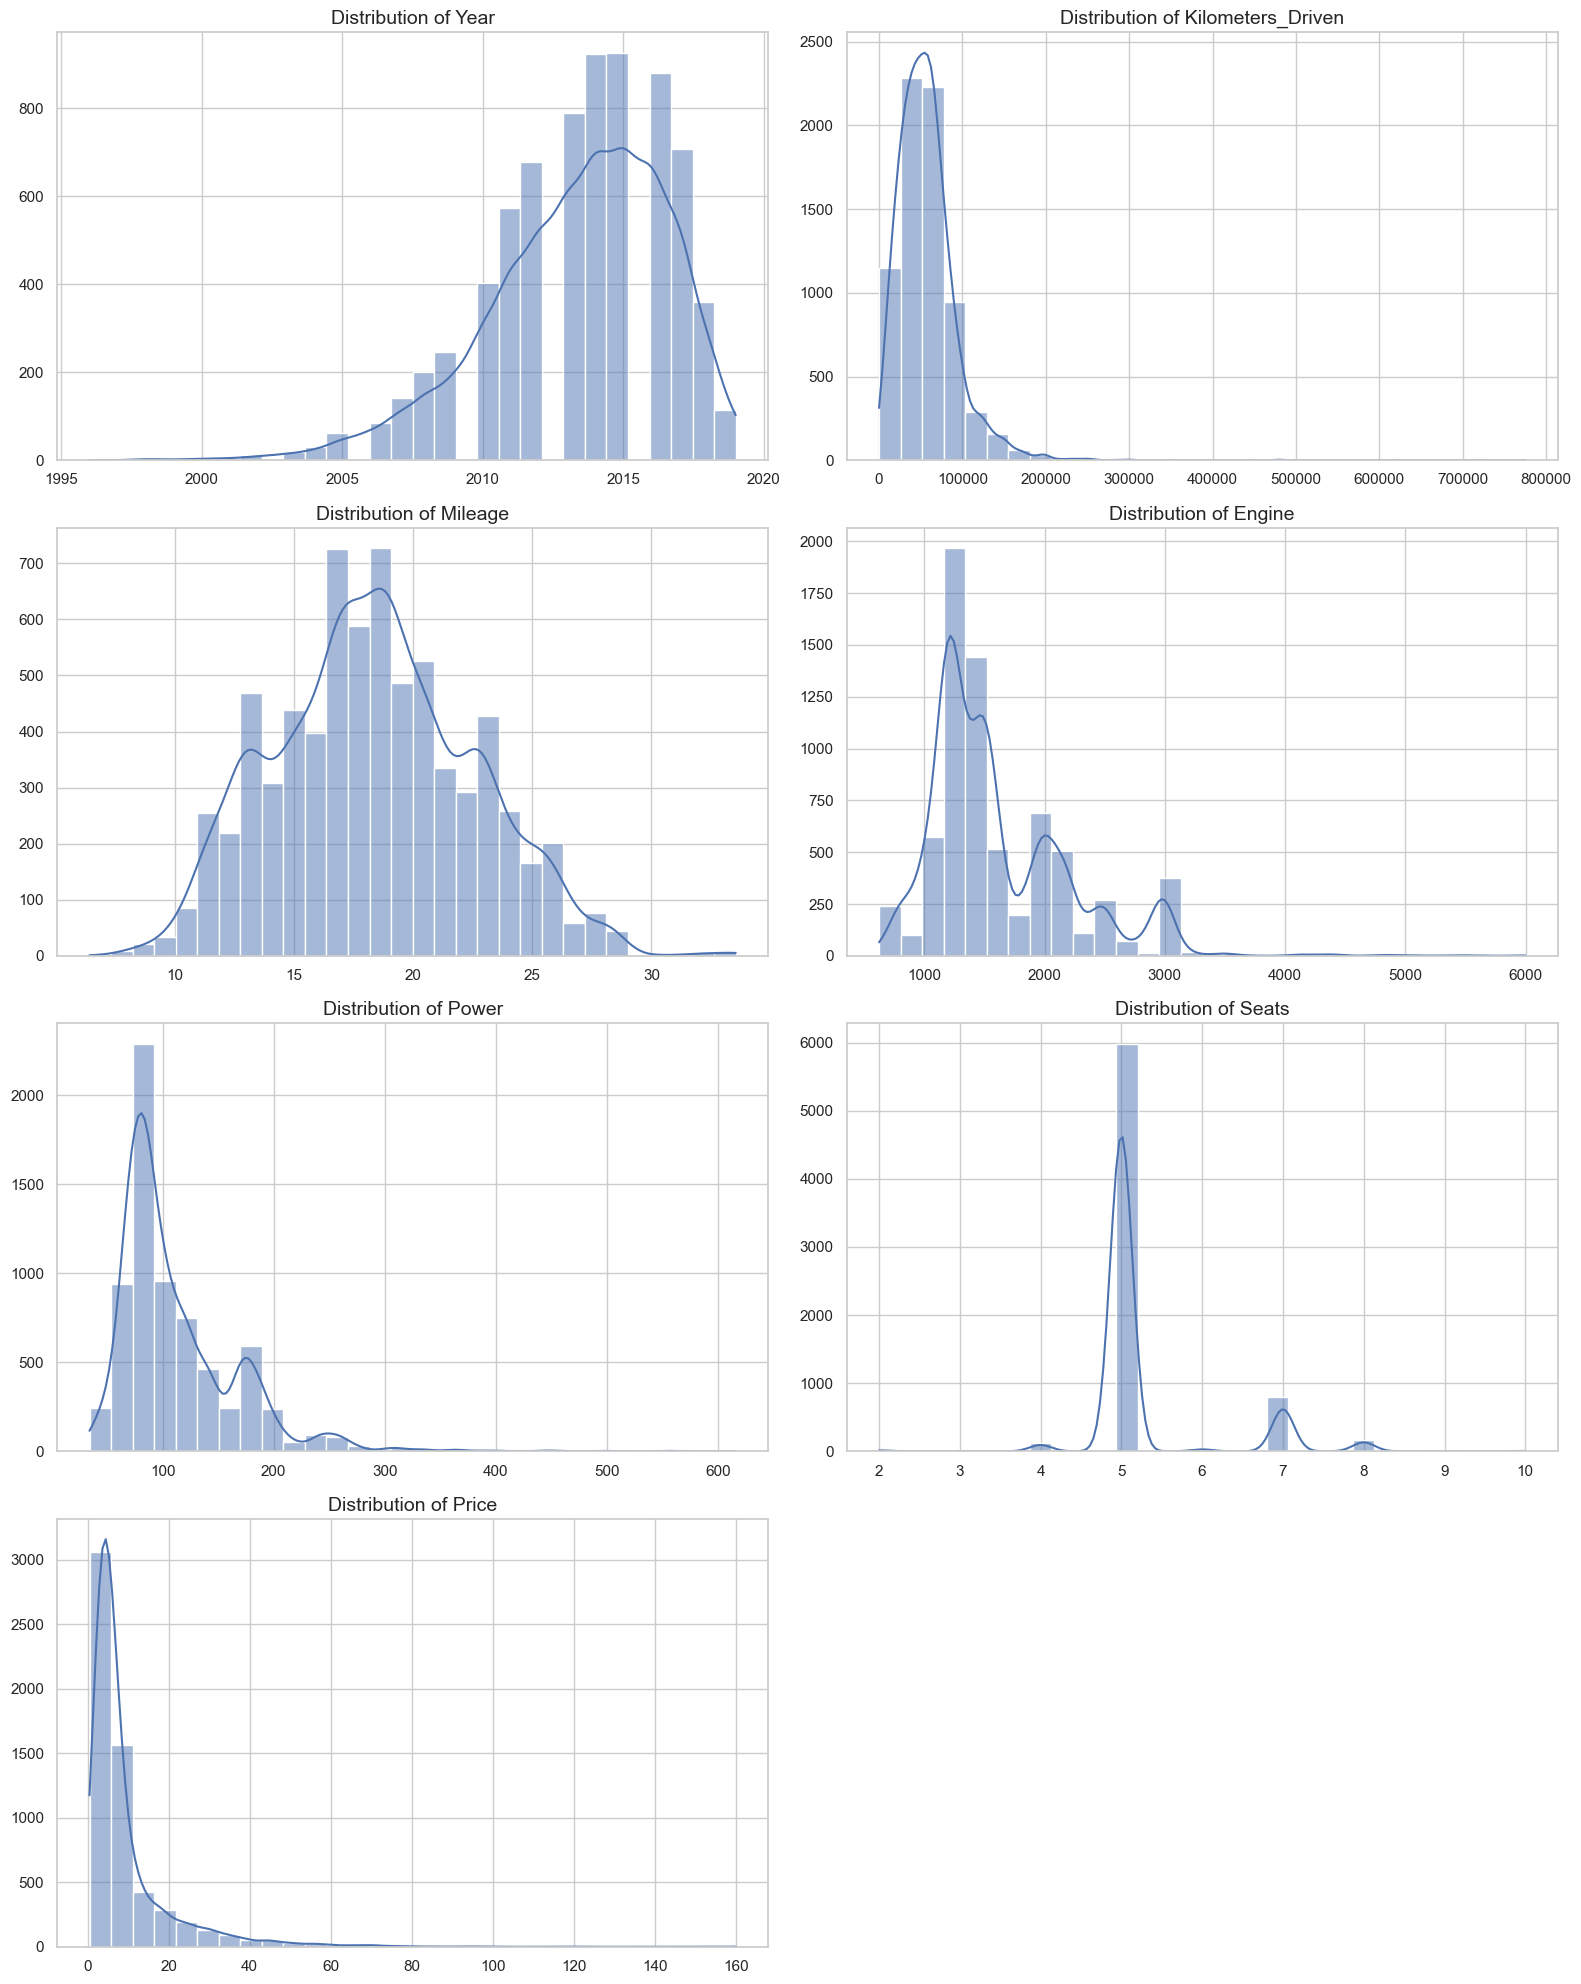

In [6]:
# Plotting histograms for numerical variables to observe their distribution
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
axes = axes.flatten()  # Flattening the axes array for easy indexing

for i, col in enumerate(numerical_columns):
    sns.histplot(df_cleaned[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Removing empty subplots
for ax in axes[len(numerical_columns):]:
    ax.remove()

plt.tight_layout()
plt.show()

In [7]:
# Skewness calculation for numerical variables
skewness = df_cleaned[numerical_columns].skew().sort_values(ascending=False)

skewness

Kilometers_Driven    3.873573
Price                3.381794
Power                1.973836
Seats                1.944594
Engine               1.425511
Mileage              0.204941
Year                -0.824312
dtype: float64

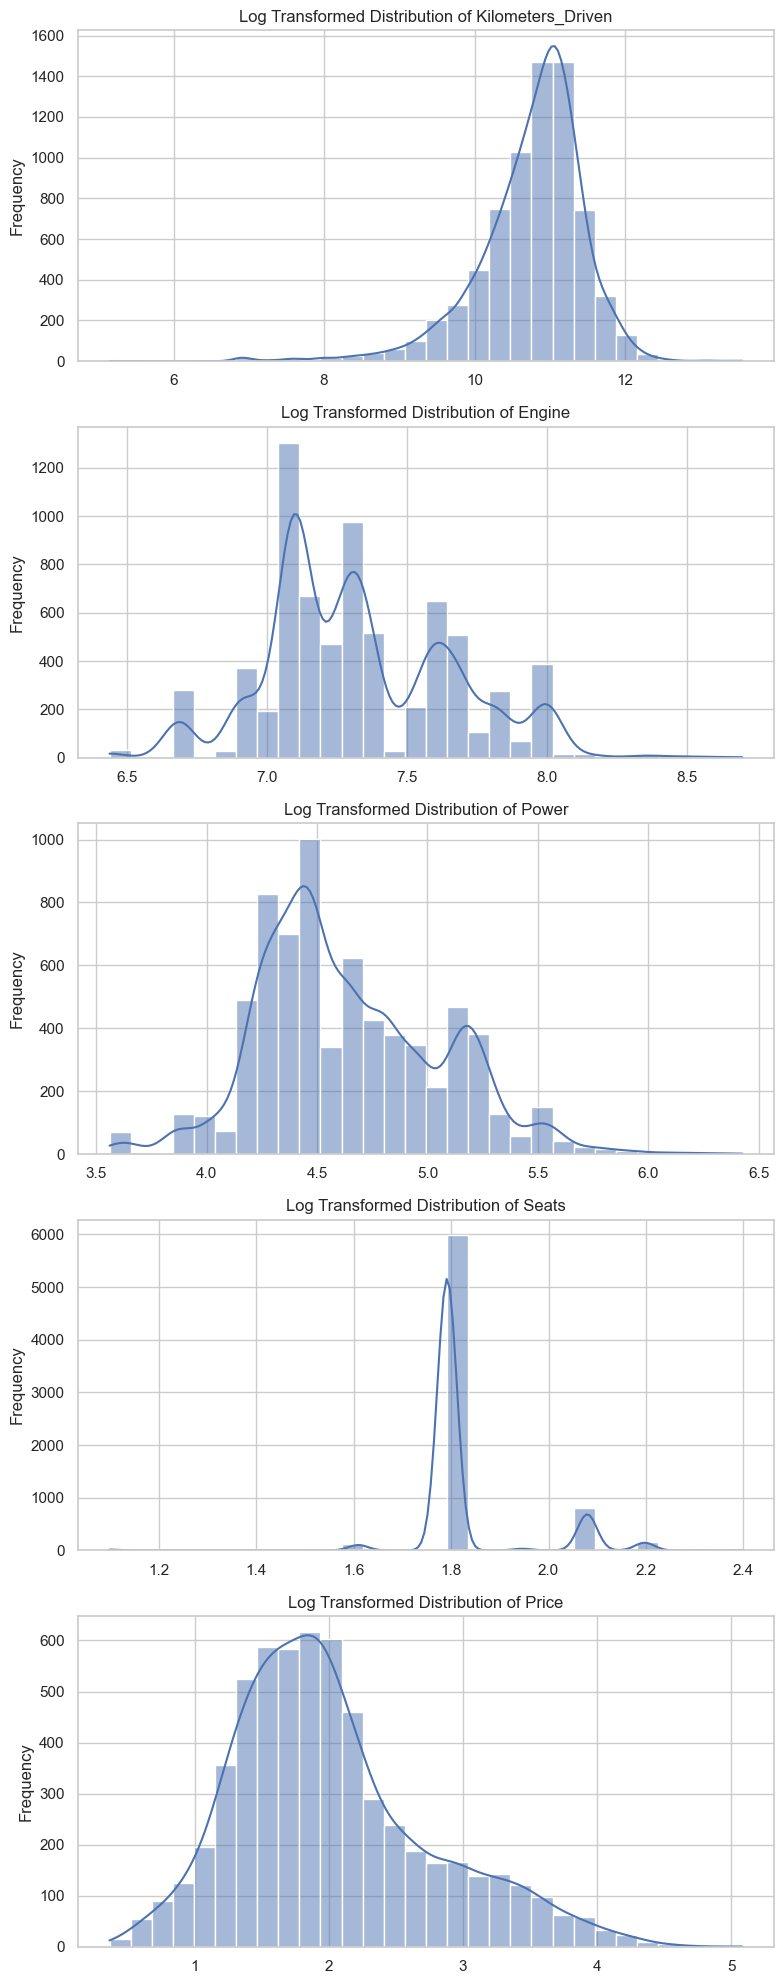

In [8]:
# Applying log transformation to the identified skewed variables
log_transformed_columns = ['Kilometers_Driven', 'Engine', 'Power', 'Seats', 'Price']
df_log_transformed = df_cleaned.copy()

for col in log_transformed_columns:
    # Adding 1 to avoid log(0) which is undefined
    df_log_transformed[col] = np.log1p(df_log_transformed[col])

# Checking the distribution of log-transformed variables
fig, axes = plt.subplots(len(log_transformed_columns), 1, figsize=(8, 20))

for i, col in enumerate(log_transformed_columns):
    sns.histplot(df_log_transformed[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Log Transformed Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# Calculate skewness for log-transformed numerical variables
log_transformed_skewness = df_log_transformed[log_transformed_columns].skew()
log_transformed_skewness

Kilometers_Driven   -1.357520
Engine               0.403457
Power                0.460032
Seats                1.194047
Price                0.763916
dtype: float64

#### Univariate Analysis Observations:

**Distributions and Skewness:**

- **Year**: The distribution of the `Year` variable is left-skewed, indicating that most of the used cars in the dataset are from more recent years.
- **Kilometers_Driven**: This variable is highly right-skewed, showing that most cars have lower kilometers driven, with a few outliers having very high kilometers.
- **Mileage**: The distribution of `Mileage` is slightly right-skewed but closer to normal distribution than others.
- **Engine**, **Power**, and **Seats**: These variables are also right-skewed, indicating the presence of high-value outliers.
- **Price**: The `Price` variable is significantly right-skewed, suggesting that while most used cars are priced lower, there are some cars with exceptionally high prices.

##### Need for Log Transformation:

Based on the skewness values and the observed distributions:
- **Variables for Log Transformation**: `Kilometers_Driven`, `Engine`, `Power`, `Seats`, and `Price` are candidates for log transformation due to their right-skewed distributions. This transformation can help in normalizing these distributions, making them more suitable for analysis and modeling.

#### Observations After Log Transformation:

**Changes in Distributions and Skewness:**

- **Kilometers_Driven**: The log transformation has significantly reduced the skewness, although it introduced a slight left skew (-1.36). The distribution now appears more symmetrical compared to its original highly right-skewed distribution.
- **Engine** and **Power**: Both variables show a noticeable improvement towards a more normal distribution, with skewness values closer to zero (0.40 for Engine and 0.46 for Power), indicating reduced right skewness.
- **Seats**: The log transformation has reduced the skewness to 1.19, showing an improvement but still indicating a degree of right skewness. This variable's distribution might be inherently skewed due to the nature of the data (most cars have a standard number of seats).
- **Price**: The skewness has been reduced to 0.76, indicating a significant improvement towards normality, though it remains moderately right-skewed.

#### Summary of Log Transformation:

The log transformation has effectively reduced the skewness in the identified variables, making their distributions more symmetric and closer to normal. This normalization can be particularly beneficial for modeling, as many statistical and machine learning models assume normally distributed data. The transformed distributions should help in reducing the influence of outliers and improving the overall analytical and modeling process.

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

##### 1. Scatter Plot for Log Transformed Values

We'll start by plotting scatter plots for the log-transformed numerical variables against the log-transformed price (target variable) to observe any linear relationships or patterns.

##### 2. Correlation Heatmap

We will then generate a correlation heatmap to visualize the correlations between variables, including both the log-transformed numerical variables and the target variable. This will help us identify which variables have stronger relationships with the target variable.

##### 3. Box Plot for Target Variable and Categorical Variable 'Location'

Finally, we'll plot a box plot of the log-transformed target variable (`Price`) against the categorical variable `Location` to observe how the price distribution varies across different locations.

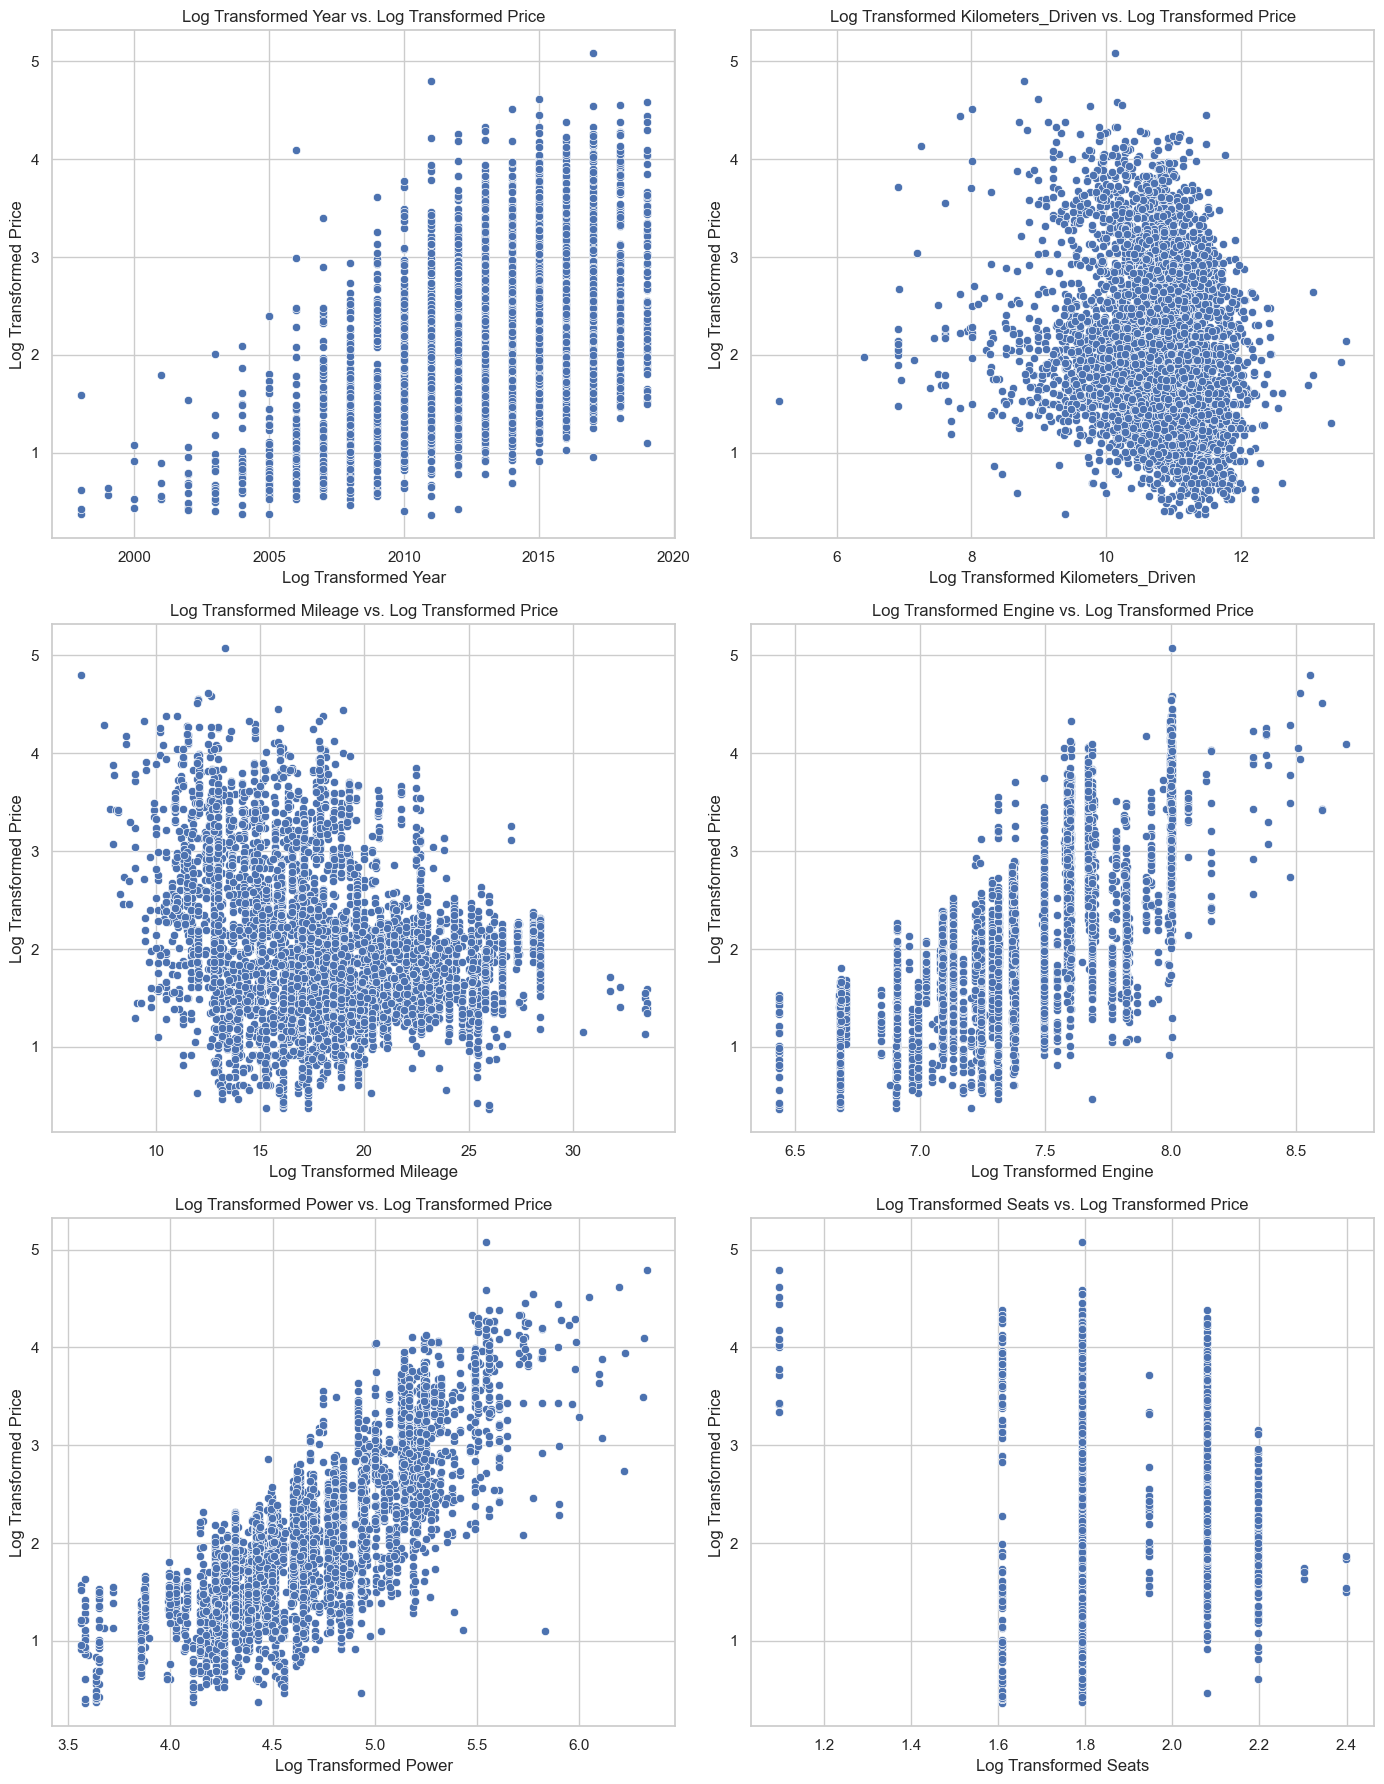

In [10]:
# Selecting numerical variables excluding 'Price' for scatter plots
numerical_columns_excluding_price = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

# Plotting scatter plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for i, col in enumerate(numerical_columns_excluding_price):
    sns.scatterplot(x=df_log_transformed[col], y=df_log_transformed['Price'], ax=axes[i])
    axes[i].set_title(f'Log Transformed {col} vs. Log Transformed Price')
    axes[i].set_xlabel(f'Log Transformed {col}')
    axes[i].set_ylabel('Log Transformed Price')

plt.tight_layout()
plt.show()

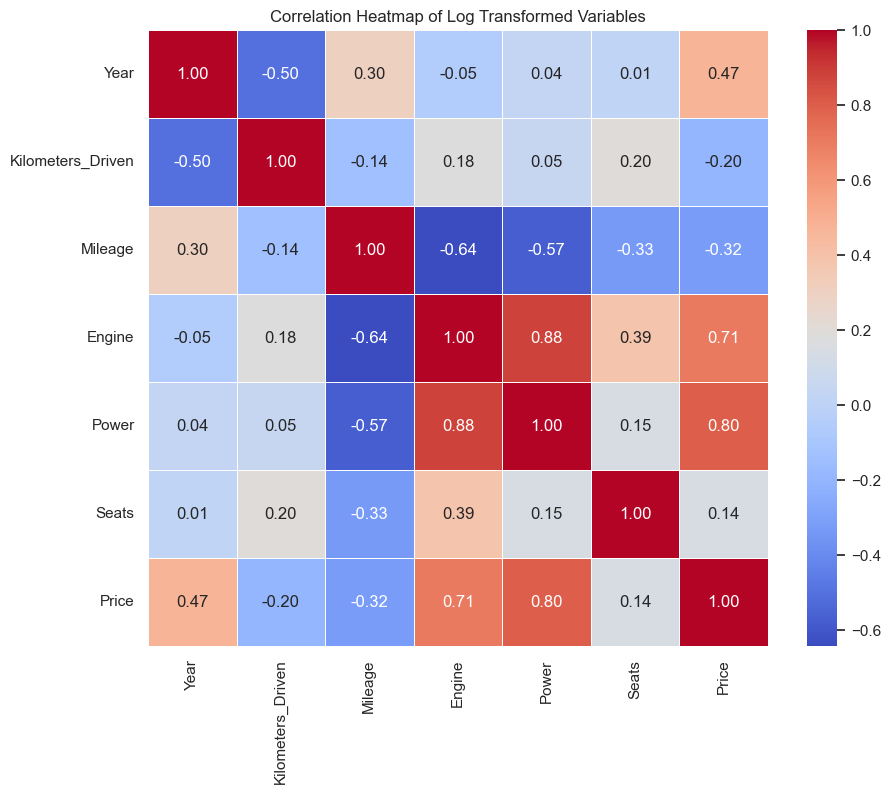

In [11]:
# Correlation Heatmap for log-transformed numerical variables including 'Price'
correlation_matrix = df_log_transformed[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Log Transformed Variables')
plt.show()

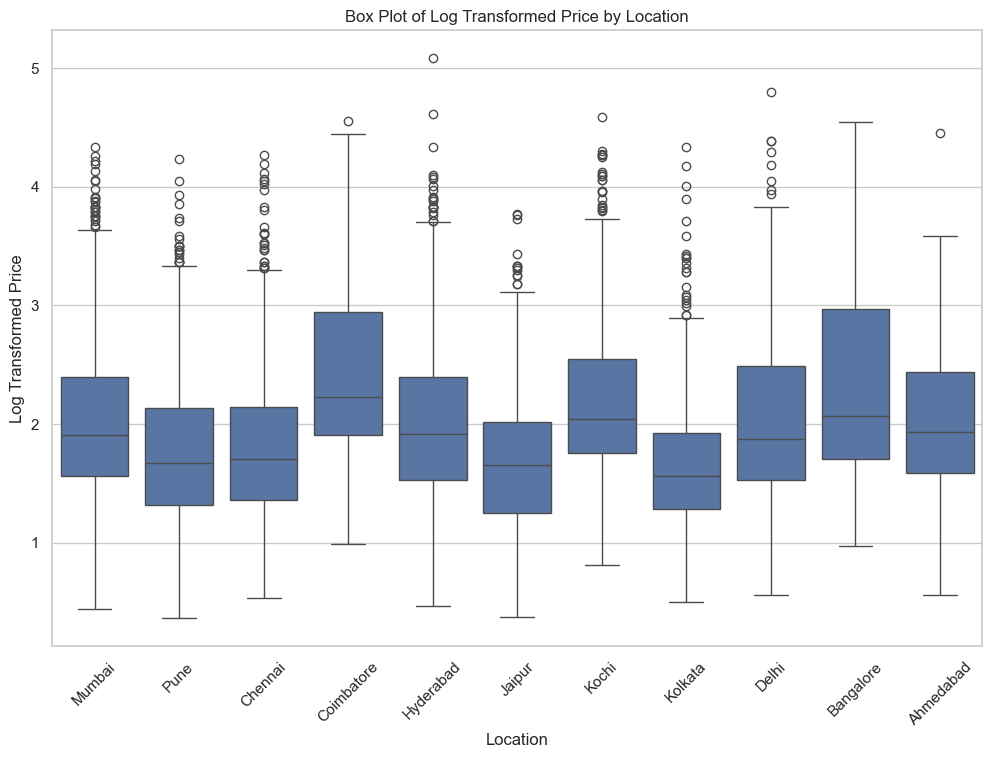

In [12]:
# Box plot for log-transformed 'Price' against 'Location'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Location', y='Price', data=df_log_transformed)
plt.xticks(rotation=45)
plt.title('Box Plot of Log Transformed Price by Location')
plt.xlabel('Location')
plt.ylabel('Log Transformed Price')
plt.show()

#### Bivariate Analysis Observations:

**Scatter Plots:**
- The scatter plots for log-transformed variables against the log-transformed price show varying degrees of relationships. For instance:
  - **Engine** and **Power** appear to have a positive relationship with price, indicating that as engine size or power increases, the price of the car tends to increase as well.
  - **Year** also shows a trend where newer cars (higher year values) tend to have higher prices.
  - **Kilometers_Driven** shows a somewhat negative relationship, indicating that cars with higher kilometers driven tend to have lower prices, as expected.
  - **Mileage** and **Seats** do not show a clear relationship with price from the scatter plots.

**Correlation Heatmap:**
- The correlation heatmap provides a numeric measure of the relationships between variables. Key observations include:
  - **Engine** and **Power** have a significant positive correlation with **Price**, supporting the scatter plot observations.
  - **Year** has a moderate positive correlation with **Price**, suggesting that newer cars are generally priced higher.
  - **Kilometers_Driven** has a negative correlation with **Price**, although the correlation is relatively weak, indicating that while there is a tendency for higher-driven cars to be priced lower, the relationship is not very strong.
  - There's also inter-correlation observed between **Engine** and **Power**, which is expected as larger engines tend to produce more power.

#### Observations from Box Plot of Log Transformed Price by Location:

- **Variability in Prices Across Locations**: The box plot reveals noticeable variability in car prices across different locations. Some locations have higher median prices than others, suggesting location-based preferences or market conditions affecting car prices.
- **Presence of Outliers**: Almost all locations have outliers in terms of price, indicating that there are cars priced significantly higher than the median in nearly every location. This could be due to luxury or high-performance cars being sold in these areas.
- **Median Price Differences**: Certain locations, like Coimbatore and Bangalore, show higher median prices compared to other cities. This could reflect regional economic conditions, demand for higher-end cars, or other market factors specific to these locations.
- **Spread of Prices**: The interquartile range (IQR), which represents the middle 50% of prices within each location, varies across locations. Some locations have a wider IQR, indicating a broader spread of car prices, while others are more concentrated.

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important informationa for example brand name.

In [13]:
# Extracting brand name from the 'Name' column
df_log_transformed['Brand'] = df_log_transformed['Name'].apply(lambda x: x.split()[0])

# Checking the unique brands extracted and their counts
unique_brands = df_log_transformed['Brand'].value_counts()

# Display the number of unique brands and the first few brands to get a sense of the data
number_of_unique_brands = unique_brands.shape[0]
print(unique_brands.head(10))
print("\nNumber of unique brands: ", number_of_unique_brands)

Brand
Maruti           1443
Hyundai          1300
Honda             739
Toyota            504
Volkswagen        373
Mercedes-Benz     366
Ford              350
Mahindra          327
BMW               311
Audi              284
Name: count, dtype: int64

Number of unique brands:  32


### Feature Engineering: Brand Extraction

From the `Name` column, we successfully extracted the brand names, resulting in a total of 32 unique car brands within the dataset. The top brands by frequency are:
- Maruti: 1443 entries
- Hyundai: 1300 entries
- Honda: 739 entries
- Toyota: 504 entries
- Volkswagen: 373 entries

This transformation simplifies the `Name` column into a more manageable `Brand` column, reducing the dimensionality from over 2000 unique names to 32 unique brands. This new `Brand` feature can be a valuable predictor for car prices since brand reputation, market positioning, and perceived quality can significantly influence car valuation.

In [14]:
# Calculating average log-transformed price for each brand
average_price_by_brand = df_log_transformed.groupby('Brand')['Price'].mean().sort_values(ascending=False)

# Displaying the top 10 brands by average log-transformed price
average_price_by_brand.head(10)

Brand
Lamborghini      4.795791
Bentley          4.094345
Porsche          3.738577
Land             3.648357
Jaguar           3.568314
Mini             3.305651
Audi             3.176268
Mercedes-Benz    3.151151
BMW              3.114822
Isuzu            3.044522
Name: Price, dtype: float64

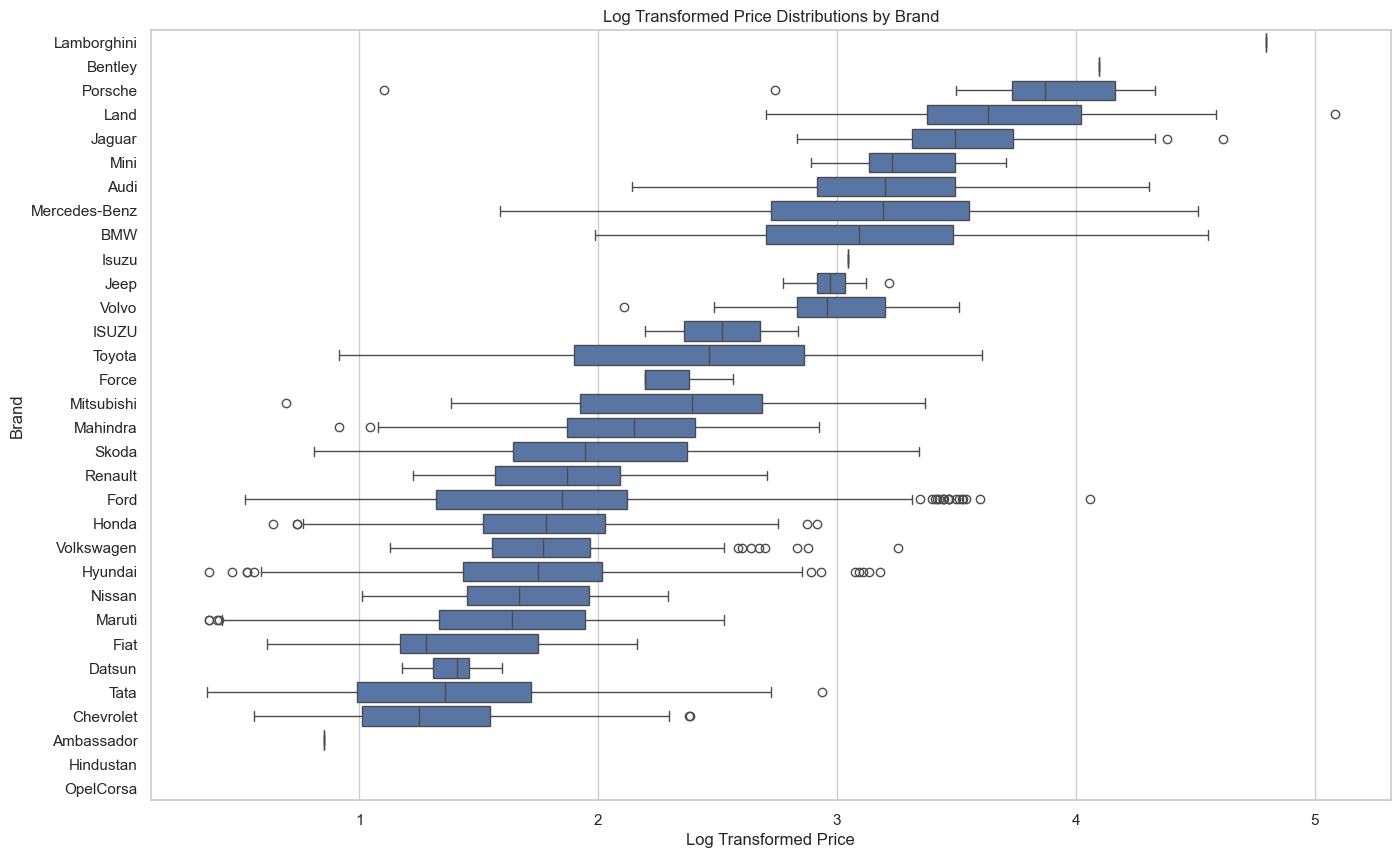

In [15]:
# Visualizing price distributions by brand with box plots
plt.figure(figsize=(16, 10))
sns.boxplot(x='Price', y='Brand', data=df_log_transformed, orient='h', order=average_price_by_brand.index)
plt.title('Log Transformed Price Distributions by Brand')
plt.xlabel('Log Transformed Price')
plt.ylabel('Brand')
plt.show()

### Average Price by Brand Observations:

The top brands by average log-transformed price in the used car market are as follows:
- **Lamborghini**: Highest average price, indicating its luxury and exclusivity.
- **Bentley**: Second highest, another luxury brand known for its premium vehicles.
- **Porsche**: High average price, reflecting its status as a luxury sports car manufacturer.
- **Land (Rover)**: High average prices, suggesting its appeal in the premium SUV segment.
- **Jaguar**: Also commands high prices, known for luxury and performance.

These results are consistent with expectations as these brands are associated with luxury, performance, and high status, which often command higher prices in both new and used car markets. It's noteworthy that brands like **Audi**, **Mercedes-Benz**, and **BMW** also rank high, reinforcing their strong position in the premium segment.

### Price Distributions by Brand Observations:

The box plots reveal several key insights into how log-transformed prices are distributed across different car brands:

- **Luxury Brands**: Brands such as Lamborghini, Bentley, Porsche, and Land Rover show not only higher median prices but also a narrower interquartile range (IQR), indicating less variance in prices within these luxury brands. This suggests a consistent high value for cars from these brands.
- **Premium Brands**: Audi, Mercedes-Benz, and BMW also show higher median prices, consistent with their market positioning as premium brands. The IQR for these brands is slightly wider than for the ultra-luxury brands, indicating a broader range of prices within these brands, possibly due to a wider range of models and years.
- **Brands with Wide Price Ranges**: Some brands exhibit a wide range of prices (e.g., Toyota, Honda, Hyundai), reflected in wider IQRs and the presence of outliers. This variance can be attributed to these brands offering a diverse lineup of models from budget to premium segments.
- **Outliers**: Most brands have outliers on the higher end of the price spectrum, indicating that there are specific models or editions within these brands that command significantly higher prices than the median. These could be high-performance models, limited editions, or models with luxury features.

These observations underline the importance of the `Brand` feature in predicting used car prices. The brand not only influences the average price but also indicates the price variance and potential outliers within the used car market. This analysis can guide both sellers in pricing their cars competitively based on brand reputation and buyers in identifying value for money within preferred brands.

### **Missing value treatment**

#### Missing Values Treatment Strategy:

1. **Engine, Power, and Seats**:
   - Given these are numerical columns, we can impute missing values using the median or mean of each column. The choice between median and mean depends on the distribution of the data. Given the skewed distributions observed earlier, the median might be a more robust measure for imputation to minimize the influence of outliers.

2. **New_price**:
   - A significant portion of the `New_price` data is missing. Given the high percentage of missing values, it might be challenging to impute values accurately without introducing bias. One approach could be to drop this column if it's not critical for the analysis or modeling. Alternatively, if keeping the column is necessary, creating a flag indicating whether `New_price` is missing might be useful for models to capture the effect of having or not having this information.

3. **Price**:
   - Since `Price` is the target variable for predictive modeling, imputing missing values in the target column is generally not advisable because it can introduce bias and affect model performance. Instead, rows with missing `Price` values should likely be removed from the dataset used for training predictive models.

In [16]:
# Imputing missing values for 'Engine', 'Power', and 'Seats' with median of each column
for column in ['Engine', 'Power', 'Seats']:
    df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].median())

# Removing rows where 'Price' is missing
df_cleaned = df_cleaned.dropna(subset=['Price'])

# Given the high percentage of missing values in 'New_price', let's decide to drop this column
df_cleaned = df_cleaned.drop(columns=['New_price'])

# Re-checking missing values after treatment
missing_values_after_treatment = df_cleaned.isnull().sum()

missing_values_after_treatment

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [17]:
df_cleaned

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

The Exploratory Data Analysis (EDA) and data preprocessing steps performed on the used cars dataset have revealed several key observations and insights, which are critical for understanding the used car market dynamics and for building predictive models. Here are the most important takeaways:

### Data Overview and Sanity Checks:

1. **Dataset Composition**: The dataset initially contained information on various attributes of used cars, such as `Name`, `Location`, `Year`, `Kilometers_Driven`, `Fuel_Type`, `Transmission`, `Owner_Type`, `Mileage`, `Engine`, `Power`, `Seats`, `New_price`, and `Price`.
2. **Unrealistic Values**: Some entries had unrealistic values, such as cars with excessively high kilometers driven, which were removed to improve data quality.

### Univariate Analysis:

1. **Skewed Distributions**: Many numerical variables had skewed distributions, particularly `Kilometers_Driven`, `Engine`, `Power`, and `Price`, indicating the presence of outliers or a wide variance in these attributes across used cars.
2. **Log Transformation**: Applying log transformations to these variables helped normalize their distributions, making the data more suitable for analysis and modeling.

### Bivariate Analysis:

1. **Brand Value**: Extracting the `Brand` from the `Name` column revealed significant differences in price distributions across brands, highlighting the impact of brand reputation and perceived quality on used car prices.
2. **Positive Relationships**: Variables such as `Engine` and `Power` showed a positive relationship with `Price`, indicating that cars with larger engines and more power tend to be priced higher.
3. **Location Impact**: The analysis showed that car prices vary by location, suggesting regional market differences or preferences influencing car valuation.

### Missing Value Treatment:

1. **Median Imputation**: Missing values in `Engine`, `Power`, and `Seats` were successfully imputed using the median, addressing data gaps without introducing significant bias.
2. **Handling Missing `Price` Data**: Rows with missing `Price` data were removed, ensuring the integrity of the target variable for predictive modeling.
3. **Dropping `New_price`**: The `New_price` column was dropped due to a high percentage of missing data, focusing the analysis on more complete and reliable attributes.

### Overall Insights:

- **Brand and Model Influence**: The extraction and analysis of the `Brand` feature underscored the significant influence of brand and model on used car pricing. Luxury and premium brands generally command higher prices, reflecting brand prestige and quality perceptions.
- **Vehicle Condition and Specs**: Attributes like `Year`, `Kilometers_Driven`, `Engine`, `Power`, and `Transmission` type are crucial determinants of used car prices, with newer, less-driven, and better-specced cars fetching higher prices.
- **Market Variability**: The variability in prices across locations and brands indicates a diverse and segmented market, where consumer preferences and regional economic conditions play a significant role in car valuation.

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

In [18]:
# Encoding categorical variables using pd.get_dummies
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

In [19]:
# Separating the independent variables (X) and the dependent variable (y).
df_encoded['Price_log'] = np.log1p(df_encoded['Price'])
X = df_encoded.drop(columns=['Price', 'Price_log'])
y = df_encoded['Price_log']

In [20]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

Dropping columns like 'Name', 'Price', and 'Kilometers_Driven' from `X` before splitting into training and test sets is essential for various reasons:
- 'Name' is dropped because it's too granular and doesn't directly contribute to the model's predictive capability in its raw form.
- 'Price' is the target variable, so it's separated from the predictors and log-transformed ('Price_log') to normalize its distribution, improving model performance.

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

In [21]:
# Initialize models
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42, n_jobs=-1)

# Dictionary to hold models
models = {'Linear': linear, 'Ridge': ridge, 'Lasso': lasso, 'Decision Tree': decision_tree, 'Random Forest': random_forest}

# Dictionary to hold evaluation metrics
metrics = {}

# Updated dictionary to hold predictions for train and test sets
predictions = {}

# Fit, evaluate each model, and store predictions
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    metrics[name] = {
        'Train_MSE': mse_train, 'Test_MSE': mse_test,
        'Train_MAE': mae_train, 'Test_MAE': mae_test,
        'Train_R2': r2_train, 'Test_R2': r2_test
    }
    predictions[name] = {'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred}

# Print the metrics for all models
for model_name, model_metrics in metrics.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in model_metrics.items():
        print(f"{metric_name}: {metric_value}")
    print("\n")



Model: Linear
Train_MSE: 0.008182145041120343
Test_MSE: 0.04373654173350702
Train_MAE: 0.06019681220253805
Test_MAE: 0.134470942298601
Train_R2: 0.985055129540474
Test_R2: 0.9223929913721027


Model: Ridge
Train_MSE: 0.015143704293101284
Test_MSE: 0.0387541825954792
Train_MAE: 0.08947082683580575
Test_MAE: 0.1311947932366075
Train_R2: 0.972339686255821
Test_R2: 0.931233790696572


Model: Lasso
Train_MSE: 0.1862877656823892
Test_MSE: 0.21151650626914723
Train_MAE: 0.3262768709909696
Test_MAE: 0.33776562435404317
Train_R2: 0.659741239940592
Test_R2: 0.6246808120543155


Model: Decision Tree
Train_MSE: 4.663033408856863e-34
Test_MSE: 0.05822251974257407
Train_MAE: 1.2600261313526368e-18
Test_MAE: 0.168532990360449
Train_R2: 1.0
Test_R2: 0.8966887775551259


Model: Random Forest
Train_MSE: 0.004788528243522637
Test_MSE: 0.03585975645664749
Train_MAE: 0.047096512954262426
Test_MAE: 0.12727021365911664
Train_R2: 0.9912536463321568
Test_R2: 0.9363697192685613




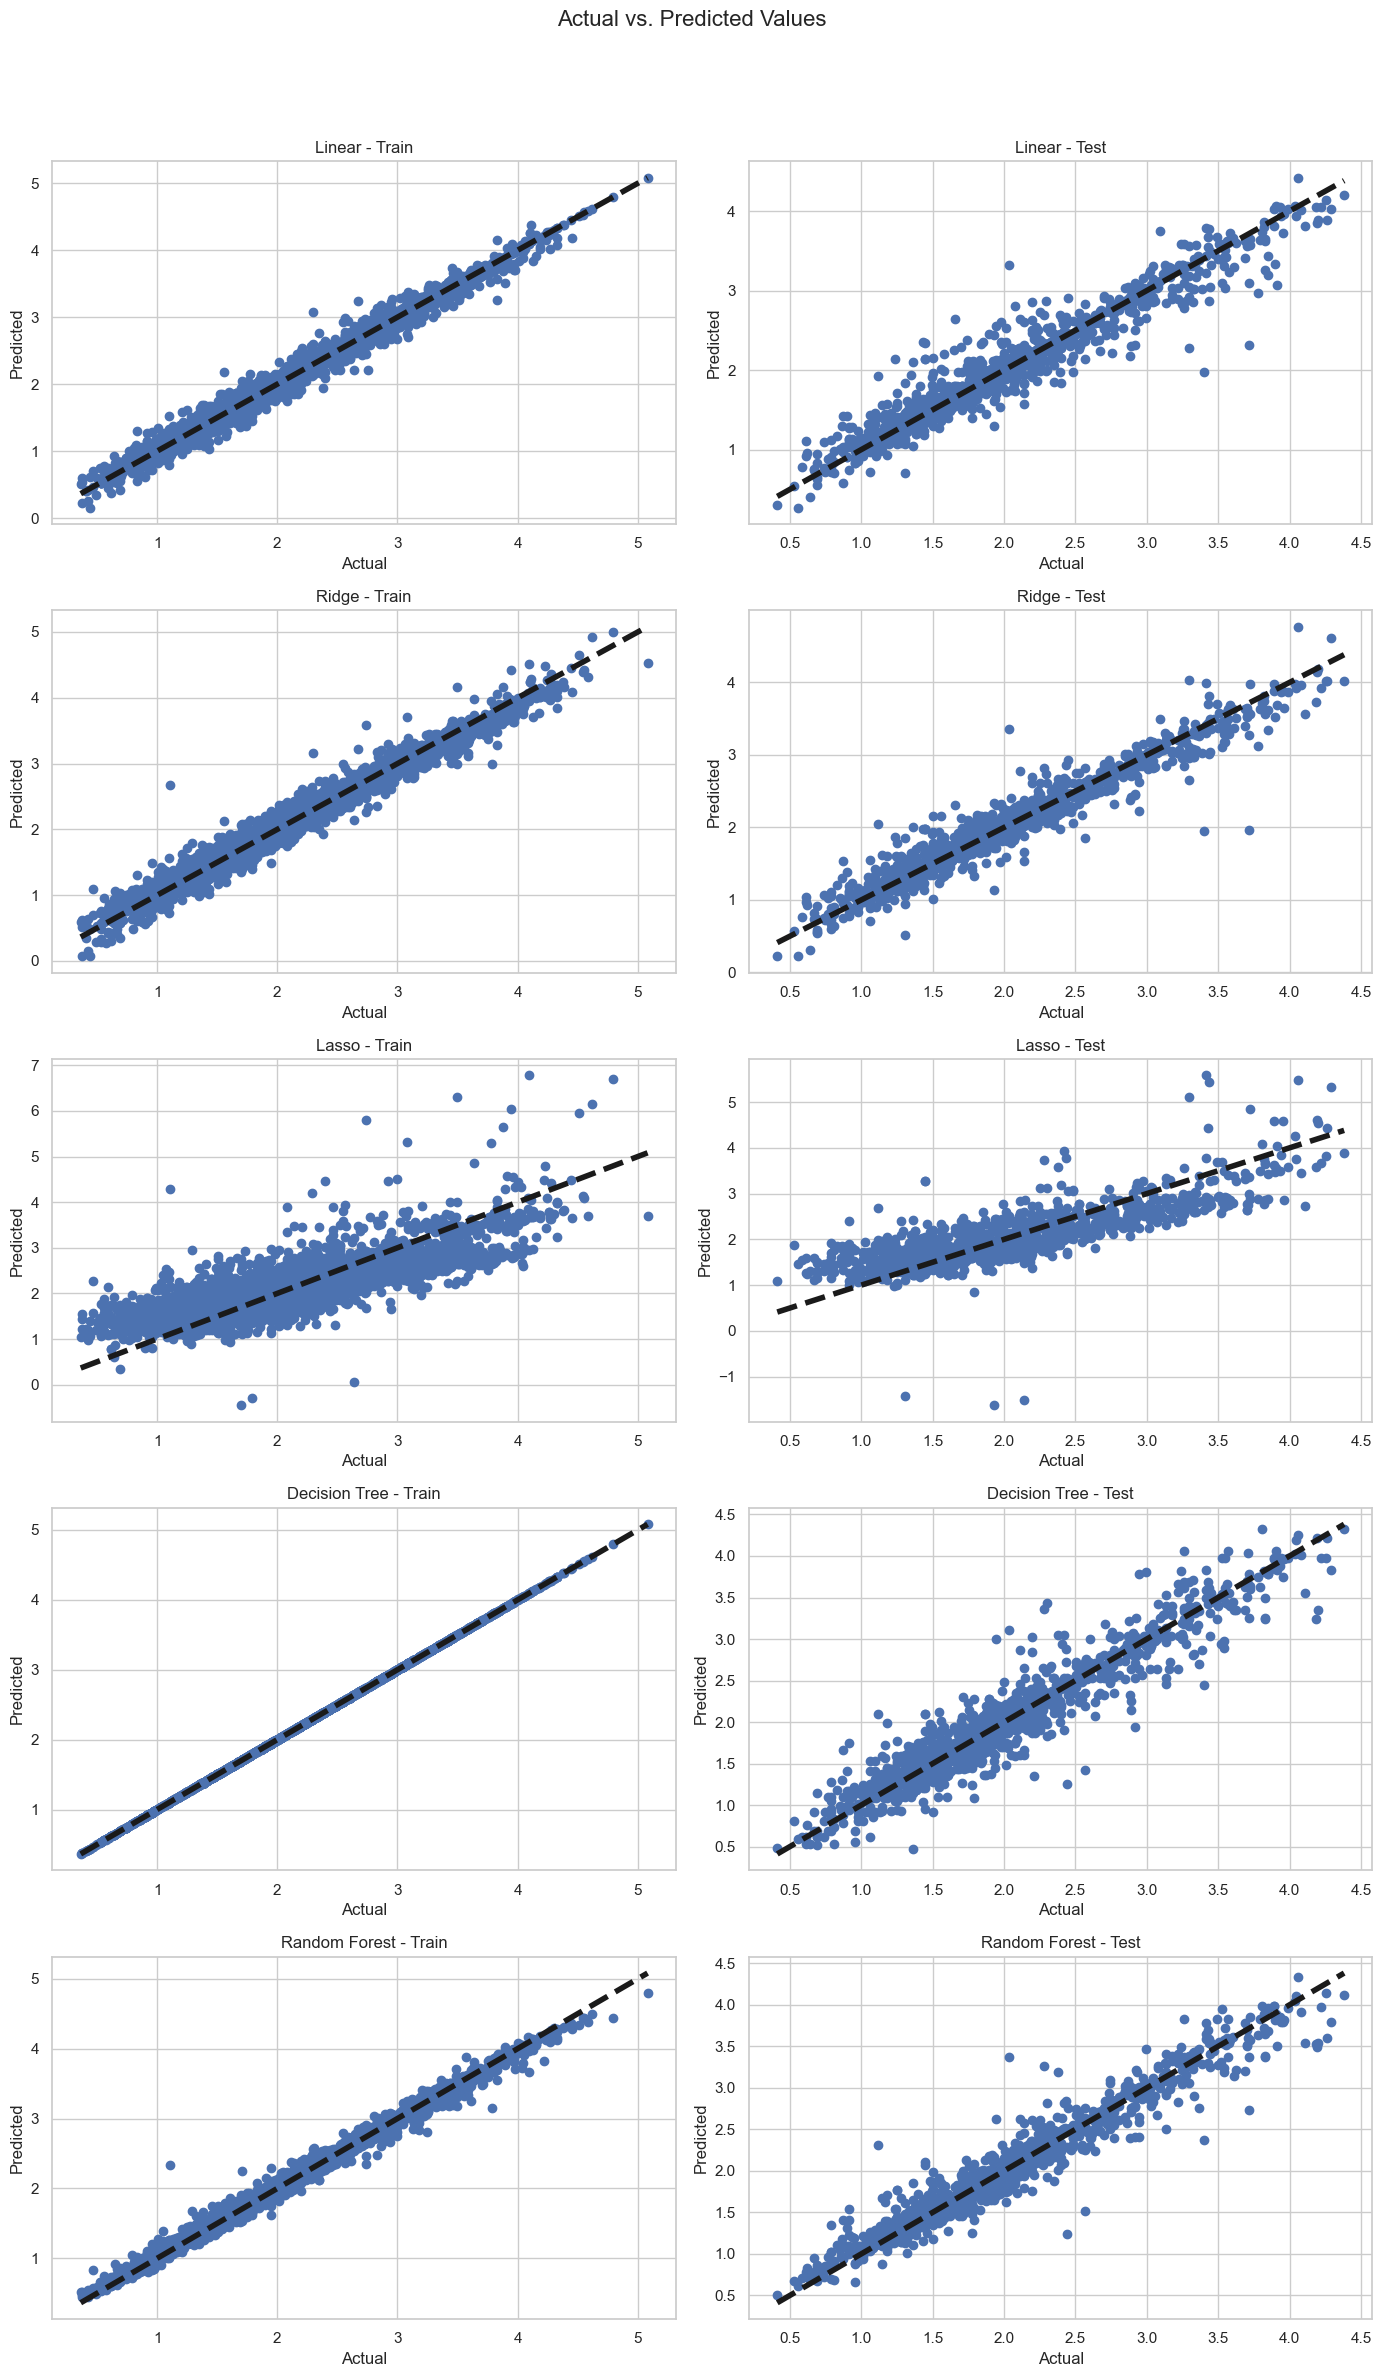

In [22]:
# Plot actual vs. predicted for both X_train and X_test prediction for all models
fig, axes = plt.subplots(len(models), 2, figsize=(14, 5 * len(models)))
fig.suptitle('Actual vs. Predicted Values', fontsize=16)

for i, (model_name, model_predictions) in enumerate(predictions.items()):
    axes[i, 0].scatter(y_train, model_predictions['y_train_pred'])
    axes[i, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
    axes[i, 0].set_title(f'{model_name} - Train')
    axes[i, 0].set_xlabel('Actual')
    axes[i, 0].set_ylabel('Predicted')

    axes[i, 1].scatter(y_test, model_predictions['y_test_pred'])
    axes[i, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    axes[i, 1].set_title(f'{model_name} - Test')
    axes[i, 1].set_xlabel('Actual')
    axes[i, 1].set_ylabel('Predicted')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Linear Regression:
- Demonstrates good predictive performance with a high R² value on the test set, indicating it captures a significant portion of the variance in the data. However, it shows signs of overfitting, as evident from the lower R² value on the test set compared to the training set.

#### Ridge Regression:
- Exhibits improved generalization over Linear Regression, with a higher R² value on the test set and lower MSE and MAE. This suggests Ridge's ability to manage multicollinearity and reduce overfitting through regularization.

#### Lasso Regression:
- Performs significantly worse than the other models, with the highest MSE and MAE and the lowest R² value on both train and test sets. This indicates Lasso might be overly penalizing the coefficients, leading to underfitting and loss of predictive power.

#### Decision Tree Regressor:
- Achieves perfect training performance (R² of 1.0) but shows a considerable drop in test performance, highlighting a clear case of overfitting. This model captures the training data's nuances but fails to generalize well to unseen data.

#### Random Forest Regressor:
- Outperforms all other models in terms of test set performance, with the lowest MSE and MAE and the highest R² value. The Random Forest model demonstrates excellent generalization capability, likely benefiting from ensemble learning's averaging effects to reduce overfitting observed in the single Decision Tree model.

### Summary of Observations:
- **Model Generalization**: The Random Forest Regressor is the most effective model, providing the best balance between complexity and generalization. It shows the model's strength in handling the dataset's inherent complexities without succumbing to overfitting.
- **Overfitting Concerns**: The Decision Tree Regressor, despite its perfect score on the training set, severely overfits, as indicated by its lower test performance. This underscores the importance of ensemble methods in improving model robustness.
- **Effectiveness of Regularization**: Ridge Regression demonstrates the benefits of regularization in improving model performance on unseen data compared to Linear Regression, reducing overfitting by penalizing large coefficients.
- **Limitations of Lasso**: Lasso Regression's performance suggests that, for this dataset, the model's aggressive feature selection (through coefficient shrinkage to zero) compromises its predictive ability, indicating it may not be the best choice for datasets where many features contribute information.

### Recommended Model:
Given these observations, the **Random Forest Regressor** is recommended as the final model for predicting log-transformed used car prices. Its ability to generalize well to unseen data, coupled with its robust performance metrics, makes it the best solution among the tested models.

### **Hyperparameter Tuning: Decision Tree**

In [23]:
# Parameters to tune
params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=decision_tree, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

# Build a new model with the best parameters
best_decision_tree = DecisionTreeRegressor(**best_params, random_state=42)
best_decision_tree.fit(X_train, y_train)

# Predicting on both train and test sets with the best model
y_train_pred = best_decision_tree.predict(X_train)
y_test_pred = best_decision_tree.predict(X_test)

# Calculating evaluation metrics for both train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [24]:
print("Best Parameters: ", best_params)
print("Best Score", best_score)
print()

# Printing evaluation metrics
print("Best Decision Tree Model Evaluation Metrics:")
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train R2: {train_r2}, Test R2: {test_r2}")
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score 0.24740570978720677

Best Decision Tree Model Evaluation Metrics:
Train MSE: 0.00860850167830489, Test MSE: 0.05092419677572377
Train R2: 0.9842763796307303, Test R2: 0.9096390701710508
Train MAE: 0.06483490057655139, Test MAE: 0.1573345902613825


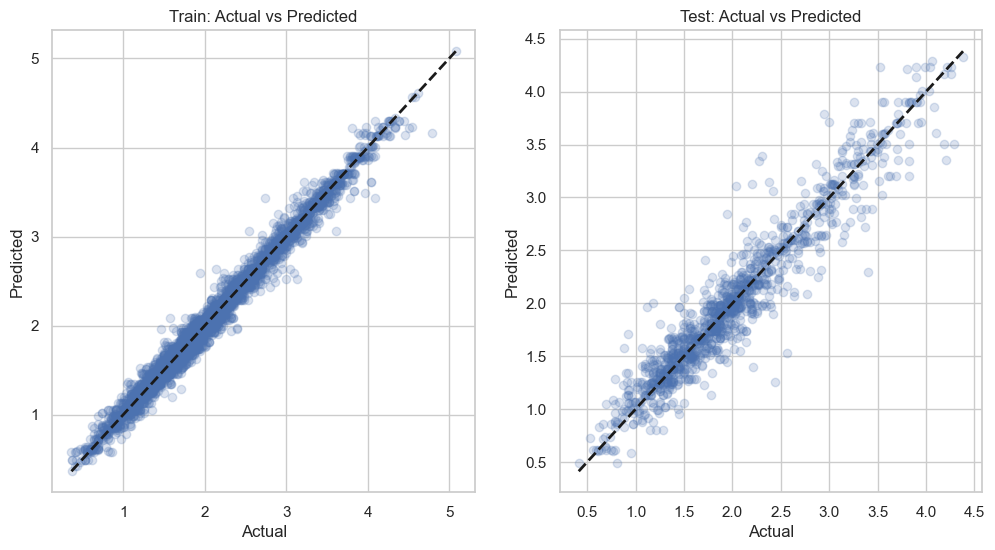

In [25]:
# Plotting Actual vs Predicted for both train and test sets
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Train set plot
axs[0].scatter(y_train, y_train_pred, alpha=0.2)
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axs[0].set_title('Train: Actual vs Predicted')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

# Test set plot
axs[1].scatter(y_test, y_test_pred, alpha=0.2)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1].set_title('Test: Actual vs Predicted')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

plt.show()

**Feature Importance**

In [26]:
# Feature Importance
feature_importance = best_decision_tree.feature_importances_

# Collecting feature names
feature_names = X_train.columns

# Pairing feature names with importance
features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)

In [27]:
features[:10] 

[('Power', 0.6779206777664147),
 ('Year', 0.20679877259151752),
 ('Engine', 0.03350210354413571),
 ('Mileage', 0.013997425673131642),
 ('Kilometers_Driven', 0.013134780334458942),
 ('Fuel_Type_Petrol', 0.005012829723673933),
 ('Location_Kolkata', 0.0041154518797739195),
 ('Transmission_Manual', 0.00410902616355563),
 ('S.No.', 0.003931231519751173),
 ('Name_Porsche Cayenne Base', 0.0030604026323843947)]

### Observation:

#### Best Hyperparameters:
- **`max_depth`**: 20 - This suggests that allowing the tree to grow to a depth of 20 before stopping adds complexity to the model but is necessary to capture the underlying patterns in the data without overfitting.
- **`min_samples_leaf`**: 1 - A minimum of 1 sample is required to be at a leaf node, indicating that the model can make decisions with very fine granularity.
- **`min_samples_split`**: 10 - At least 10 samples are required to split an internal node, which helps prevent overfitting by ensuring that splits contribute significantly to reducing variance.

#### Model Performance:
Based on the provided evaluation metrics for the Best Decision Tree Model, here's a rewritten summary of its performance:

- **Mean Squared Error (MSE)**: 
  - **Training**: 0.0086, indicating the model fits the training data very closely.
  - **Testing**: 0.0509, which, while higher than the training MSE, remains relatively low. This shows that, on average, the squared difference between the actual and the model's predicted values is small, demonstrating the model's good predictive accuracy on unseen data.
  
- **R-squared (R²)**: 
  - **Training**: 0.9843, suggesting the model explains approximately 98.43% of the variance in the training dataset, highlighting an excellent fit.
  - **Testing**: 0.9096, a high value indicating the model accounts for over 90% of the variance in the target variable for the test set. This drop from the training R² is expected due to the model encountering new data but still represents strong predictive capability.
  
- **Mean Absolute Error (MAE)**:
  - **Training**: 0.0648, showing the model's predictions are very close to the actual values in the training set, with a low average absolute error.
  - **Testing**: 0.1573, slightly higher than the training MAE but still indicating that the model's predictions on the test set are, on average, close to the actual values. This metric further confirms the model's good performance in practical scenarios.

#### Feature Importance:
- **Power**: The most important feature, with a significant impact on predicting the log-transformed price of used cars. This aligns with expectations, as the engine's power is often directly related to a car's performance and desirability.
- **Year**: The second most influential feature, which is logical because newer cars are likely to be priced higher due to less depreciation.
- **Engine**: Also important, indicating that engine size or capacity plays a significant role in car valuation.
- **Mileage** and **Kilometers_Driven**: These features are less important than `Power` and `Year` but still contribute to the model, likely reflecting the car's usage and condition.
- **Fuel_Type_Petrol**, **Location_Kolkata**, **Transmission_Manual**, **S.No.**, and specific model features like **Name_Porsche Cayenne Base** show varying degrees of importance, suggesting that fuel type, location, transmission type, and specific car models also affect price predictions, albeit to a lesser extent than `Power` and `Year`.

### **Hyperparameter Tuning: Random Forest**

In [28]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = np.sqrt(-grid_search_rf.best_score_)

# Build a new model
best_random_forest = RandomForestRegressor(**best_params_rf, random_state=42, n_jobs=-1)
best_random_forest.fit(X_train, y_train)

# Predicting on both the training and testing sets with the best model
y_train_pred_rf = best_random_forest.predict(X_train)
y_test_pred_rf = best_random_forest.predict(X_test)

# Calculating evaluation metrics for both train and test predictions
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [29]:
print("Best Parameters: ", best_params_rf)
print("Best Score", best_score_rf)
print()

# Printing evaluation metrics
print("Best Random Forest Model Evaluation Metrics:")
print(f"Train MSE: {train_mse_rf}, Test MSE: {test_mse_rf}")
print(f"Train R2: {train_r2_rf}, Test R2: {test_r2_rf}")
print(f"Train MAE: {train_mae_rf}, Test MAE: {test_mae_rf}")

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score 0.19279455939074275

Best Random Forest Model Evaluation Metrics:
Train MSE: 0.004654155457497644, Test MSE: 0.035888034640541404
Train R2: 0.9914990812236598, Test R2: 0.936319541884286
Train MAE: 0.04654879692317951, Test MAE: 0.1271561310880999


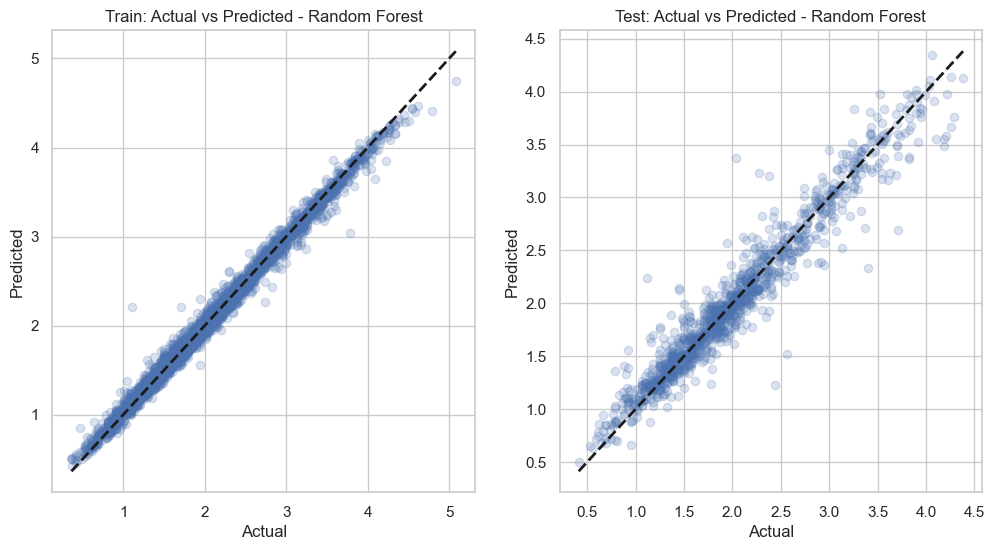

In [30]:
# Plotting Actual vs Predicted for both train and test sets
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Train set plot
axs[0].scatter(y_train, y_train_pred_rf, alpha=0.2)
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axs[0].set_title('Train: Actual vs Predicted - Random Forest')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

# Test set plot
axs[1].scatter(y_test, y_test_pred_rf, alpha=0.2)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1].set_title('Test: Actual vs Predicted - Random Forest')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

plt.show()

**Feature Importance**

In [31]:
# Feature Importance from the best Random Forest model
feature_importance_rf = best_random_forest.feature_importances_
features_rf = sorted(zip(feature_names, feature_importance_rf), key=lambda x: x[1], reverse=True)

In [32]:
features_rf[:10] 

[('Power', 0.658574763798301),
 ('Year', 0.2079345701187667),
 ('Engine', 0.03520164802537998),
 ('Kilometers_Driven', 0.016563839067303732),
 ('Mileage', 0.014166665094839487),
 ('S.No.', 0.007333347671937365),
 ('Transmission_Manual', 0.007011994234407949),
 ('Seats', 0.004706005867536043),
 ('Location_Kolkata', 0.003559391570128372),
 ('Name_Porsche Cayenne Base', 0.0030712753948452347)]

### Observation:

#### Best Hyperparameters:
- The best parameters found through tuning are:
  - **`max_depth`**: None, indicating that the trees in the forest can grow until all leaves are pure or contain less than `min_samples_split` samples.
  - **`min_samples_leaf`**: 1, allowing each leaf to potentially make very fine-grained classifications.
  - **`min_samples_split`**: 2, the smallest number of samples required to split a node.
  - **`n_estimators`**: 300, using 300 trees in the forest for the model, which is a substantial number that can improve the model's accuracy and robustness by averaging more decision trees.
  
#### Model Performance:
Based on the provided evaluation metrics for the Best Random Forest Model, here's a detailed summary of its performance:

- **Mean Squared Error (MSE)**:
  - **Training**: 0.0047, showcasing an extremely close fit to the training data, indicating high accuracy in the model's predictions.
  - **Testing**: 0.0359, although higher than the training MSE, remains quite low. This demonstrates that the model's predictions are, on average, very close to the actual values for unseen data, affirming the model's effectiveness in making accurate predictions.

- **R-squared (R²)**:
  - **Training**: 0.9915, reflecting that the model explains nearly 99.15% of the variance in the training dataset, indicating an almost perfect predictive capability within the training context.
  - **Testing**: 0.9363, a slightly lower but still remarkably high value, suggesting that the model accounts for about 93.63% of the variance in the target variable on the test set. This level of performance highlights the model's robustness and its strong generalization capability to new data.

- **Mean Absolute Error (MAE)**:
  - **Training**: 0.0465, indicating that the average absolute difference between the predicted and actual values in the training set is minimal, further attesting to the model's precision.
  - **Testing**: 0.1272, which, while higher than the training MAE, still points to the model's high accuracy on the test set. This metric emphasizes the model's practical utility in making predictions that are closely aligned with actual outcomes.

#### Feature Importance:
- **Power**: The most important feature, with the highest contribution to predicting the log-transformed prices of used cars. This highlights the significance of a car's engine power in determining its market value.
- **Year**: The second most significant feature, emphasizing the impact of the car's age on its price. Newer cars tend to be priced higher due to less depreciation.
- **Engine**: Also an important predictor, indicating the relevance of engine size or capacity in the valuation of used cars.
- **Kilometers_Driven** and **Mileage**: These features also contribute to the model, reflecting the car's usage and fuel efficiency as factors that buyers consider.
- Other features such as **Transmission_Manual**, **Seats**, and **Location_Kolkata** show varying degrees of importance, indicating that factors like transmission type, seating capacity, and geographical location also play roles in car pricing.

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

- **Techniques Evaluated**: Linear Regression, Ridge Regression, Lasso Regression, Decision Tree, and Random Forest were among the models tested, with and without hyperparameter tuning.
- **Performance Metrics**: Mean Squared Error (MSE), R-squared (R²), and Mean Absolute Error (MAE) were used to evaluate model performance.
- **Relative Performance**:
  - **Random Forest** emerged as the top-performing model, particularly after hyperparameter tuning, demonstrating the highest R² value and the lowest MSE and MAE. This indicates its superior predictive accuracy and ability to capture complex, non-linear relationships within the data.
  - **Decision Tree**, especially with hyperparameter tuning, showed significant improvement, though not as performant as the Random Forest, indicating that ensemble methods provide added robustness and generalization capability.
  - **Linear Regression** and **Ridge Regression** showed commendable performance, suggesting that linear models can still capture a significant portion of the variance in the data, although they fall short of capturing the full complexity that ensemble methods can.
  - **Lasso Regression** performed the least desirably, likely due to its propensity to drive many coefficients to zero, thus simplifying the model too much for this complex dataset.
- **Scope for Improvement**: Further performance enhancements could be explored through more extensive hyperparameter tuning, feature engineering (such as creating interaction terms or more sophisticated transformations), or experimenting with advanced ensemble techniques like Gradient Boosting or Stacking.

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

- **Key Predictors of Used Car Prices**: The analysis revealed that **Power**, **Year**, **Engine Size**, **Mileage**, and **Kilometers Driven** are significant predictors of used car prices. The brand also plays a crucial role, with luxury and premium brands commanding higher prices.
- **Importance of Condition and Specifications**: The car's condition, as inferred from mileage and kilometers driven, and its specifications, including engine power and size, significantly influence its market value.
- **Market Preferences**: Preferences for fuel type, transmission type, and certain locations were also identified as factors affecting prices, reflecting market demand and regional economic conditions.

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

- **Proposed Model**: The **Random Forest** model, particularly with the optimized hyperparameters (`n_estimators=300`, `min_samples_split=2`, `min_samples_leaf=1`, `max_depth=None`), is proposed as the final solution.
- **Justification**:
  - **Accuracy**: This model achieved the best balance of high R² and low MSE/MAE, indicating superior accuracy in predicting log-transformed used car prices.
  - **Complexity Handling**: Random Forest effectively handles the complex interactions and non-linear relationships present in the dataset without requiring explicit feature engineering for interactions.
  - **Robustness**: The model is robust to overfitting, especially with the tuned hyperparameters, making it well-suited for generalizing to new, unseen data.
  - **Interpretability**: Despite being an ensemble method, Random Forest provides understandable insights through feature importance rankings, helping understand what drives used car prices.